# The Pattern of High Pollutant Days

To get an overview of how relatively high pollutant days have varied over the last 10 years, daily means were split into 3 categories and plotted as bars to create a barcode style chart. The divisions are somewhat arbitrary. The ‘high’ pollutant level is set at the WHO 24-hour mean guideline limit for particulates and the WHO annual mean guideline limit for nitrogen dioxide.

In [1]:
# for data handling
import pandas as pd
import numpy as np

# for plots
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Aggregated no2 data for 10 background sites 2009 - 2019
no2dat = pd.read_csv('data/no2dat.csv', index_col=["date"],  parse_dates=True,)
# Aggregated pm25 data - no glazebury or ladybower
pm25dat = pd.read_csv('data/pm25dat.csv', index_col=["date"],  parse_dates=True,)

In [2]:
colours = ["#ffffff","#91bfdb","#ffffbf","#fc8d59"] # white, blue, yellow, orange
    
## vertical bars, horizontal key, 3 functions to create chart##

def barcodev(ax,df) :
# create single barcode type plot (stripechart) on ax with line colour set in 'colour' of df
# df indexed by time, assumed 1 year 
## quicker if use patch collection but creates extra lines rather than smooth shapes
    YEAR = df.index[0].year
    n = df.shape[0] # num days in yr 

    bars=[]
    for i in range(n):
        poly = Polygon(list(zip([0,0,1,1],[i,i+1,i+1,i])), facecolor=df.colour[i])
        ax.add_patch(poly)
        #bars.append(poly)
    #p = PatchCollection(bars, match_original=True)
    #ax.add_collection(p)
        
    ax.set_ylim(370,0) 
    ax.set_xlim(0,1)

    plt.text(0,-12,YEAR,fontsize=14 )
    # no ticks or labels
    #plt.axis('off')
    plt.tick_params(axis='both', which='both',bottom=False, top=False, left=False, labelleft=False,
                    right=False, labelbottom=False ) 
    return()

def draw_key(ax_key, cutoffs, colours) :
    # horizontal key
    ax_key.set_xlim(0,20)
    ax_key.set_ylim(0,1)  
    # plot boxes
    ys = [0.1, 0.9, 0.9, 0.1]
    xs = [0, 0, 1, 1]
    #missing
    xy = list(zip(xs,ys))
    poly = Polygon(xy, edgecolor='k', facecolor=colours[0])
    ax_key.add_patch(poly)
    plt.text(xs[0] + 2, .5, "no data", fontsize=12)
    # low, med
    for i in range(2):
        xs = [x+5 for x in xs]
        xy = list(zip(xs,ys))
        poly = Polygon(xy, edgecolor='k', facecolor=colours[i+1])
        ax_key.add_patch(poly)
        plt.text(xs[0]+2,.5, str(cutoffs[i]) + "-" + str(cutoffs[i+1]),fontsize=12)
    # High
    xs = [x+5 for x in xs]
    xy = list(zip(xs,ys))
    poly = Polygon(xy, edgecolor='k', facecolor=colours[3])
    ax_key.add_patch(poly)
    plt.text(xs[0]+2,.5, ">" + str(cutoffs[2]),fontsize=12)
    
    plt.text(19,.5,"($\mu$g/$m^3$)", fontsize=12)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelsize=14, 
                labelleft=False, labelbottom=False, left=False, right=False, labeltop=False)
    return()

def barcode(POL = "pm25", SITE = "Warrington", 
                     YEARS = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']) :
# plots vertical yearplot barcode
# function to create multiple barcode style plots showing low medium and high levels of pollutants by year
    # set cutoff points and datafile according to Pollutant
    cutoffs = [0,10,25,1000]
    dataf = pm25dat
    if (POL == 'no2') : 
        cutoffs = [0,20,40,1000]
        dataf = no2dat
        
    # calculate daily means with threshold of 20 measurements per day
    dgroups = dataf.resample('D')
    dm = dgroups.mean()[dgroups.count()>20] 
    df = pd.DataFrame({POL: dm[SITE].copy()})    
    
    # assign colours to data according to cutoff points
    df['colour'] = pd.cut(df[POL], cutoffs, right=False, labels=colours[1:4])
    df['colour'] = df['colour'].cat.add_categories([colours[0]])
    df['colour'] = df['colour'].fillna(colours[0])

    ### create plot
    fig = plt.figure(figsize = (9,9))
    # 2 rows - 1 for key, len(YEARS) cols
    gs = GridSpec(2,len(YEARS), height_ratios=[20,1]) 
    
     # horizontal key
    ax_key = fig.add_subplot(gs[1,:], frameon=False)
    draw_key(ax_key,cutoffs,colours)
   
    # first plot with labels (lhs)
    ax1 = fig.add_subplot(gs[0,0], frameon=False)
    barcodev(ax1,df.loc[YEARS[0]])
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelsize=14, 
                labelbottom=False, left=False, right=False, labelright=False, labelleft=True)
    ylocs = [15,75,135,196,258,319] # for daily plot
    ylabs = ['Jan','Mar','May','Jul','Sep','Nov']
    plt.yticks(ylocs[:],ylabs[:], fontsize = 12)
    # rest of plots
    for num in range(1,len(YEARS)):
        ax = fig.add_subplot(gs[0,num], frameon=False)
        barcodev(ax,df.loc[YEARS[num]])
    
    fig.suptitle(SITE + " Mean Daily " + POL, fontsize = 18)
    return(fig,ax) # return final ax

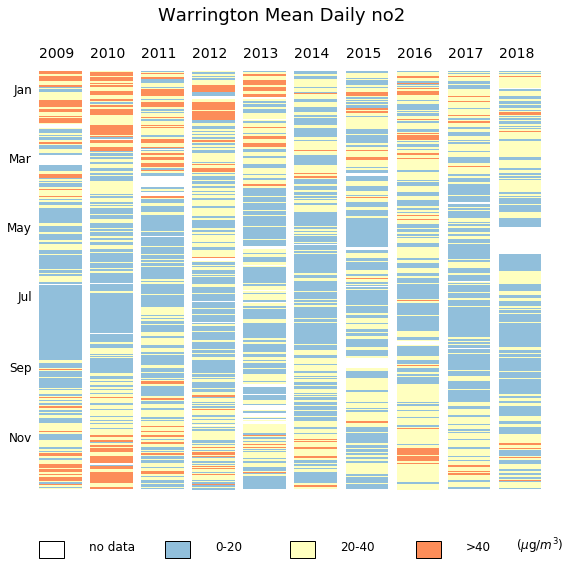

In [3]:
fig = barcode(SITE = "Warrington", POL = "no2")

There is considerable variation in the number and timing of high pollutant days between years though higher pollutant days are rare in the summer months (May to September). Over the decade a general downward trend in the number of higher NO2  days can be seen at Warrington. But there is no clear corresponding increase in low NO2  days.

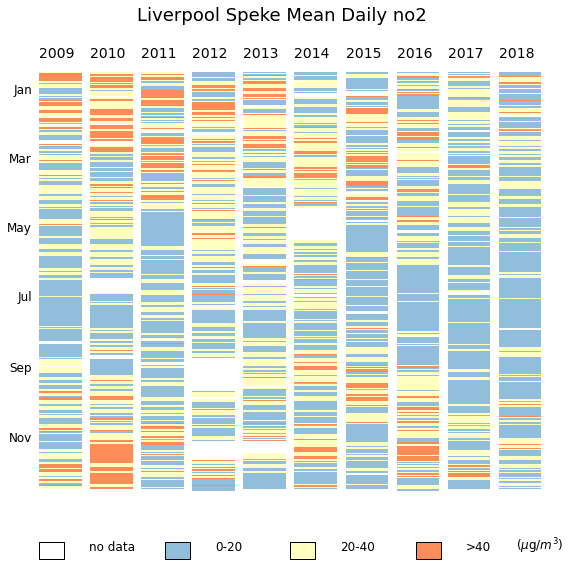

In [4]:
fig = barcode(SITE="Liverpool Speke", POL = "no2")

By comparison Liverpool Speke had more low NO<sub>2</sub>&nbsp; days than Warrington in recent years. 

The pattern of higher particulates reveals the same summer/winter distribution with few high pollutant days in the summer months. The number of days exceeding the WHO guideline limit for particulates has reduced over the decade.

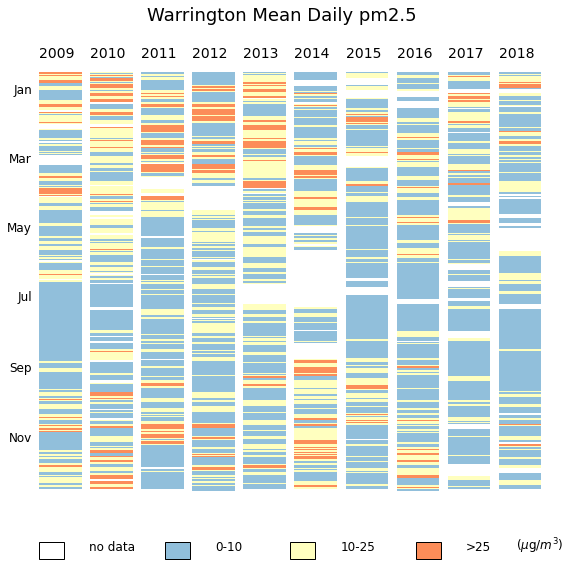

In [5]:
fig,ax = barcode(SITE = "Warrington", POL = "pm2.5")
plt.show()